#References
* https://mksaad.wordpress.com/2019/12/21/stacking-vs-bagging-vs-boosting/
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* https://dropsofai.com/bagging-boosting-and-stacking-in-machine-learning/
* https://duchesnay.github.io/pystatsml/machine_learning/ensemble_learning.html
* https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674
* https://inria.github.io/scikit-learn-mooc/ensemble/boosting_slides.html

In [ ]:
!pip install joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.3 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=eb8f170d186e80b9839d7f610cb42390b8d2cecf5a1a3b49f4d8ba910d27f208
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## The Bias-Variance Tradeoff

**Bias** is an error which arises due to false assumptions made in the learning phase of a model. A high bias can cause a learning algorithm to skip important information and correlations between the independent variables and the class labels, thereby under-fitting the model.

**Variance** tells us how sensitive a model is to small changes in the training data. That is by how much the model changes. High variance in a model will make it prone to random noise present in the dataset thereby over-fitting the model.

A low bias and a low variance, although they most often vary in opposite directions, are the two most fundamental features expected for a model. Indeed, to be able to “solve” a problem, we want our model to have enough degrees of freedom to resolve the underlying complexity of the data we are working with, but we also want it to have not too much degrees of freedom to avoid high variance and be more robust. This is the well known bias-variance tradeoff.

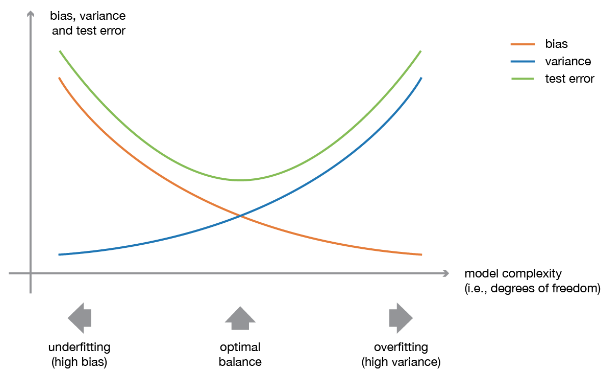

# Ensemble Learning

Ensemble learning is a machine learning paradigm where multiple models (often called **weak learners**) are trained to solve the same problem and combined to get better results. The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.

Weak learners (or base models) are models that can be used as building blocks for designing more complex models by combining several of them. Most of the time, these basics models perform not so well by themselves either because they have a high bias (low degree of freedom models, for example) or because they have too much variance to be robust (high degree of freedom models, for example). Then, the idea of ensemble methods is to combine several of them together in order to create a strong learner (or ensemble model) that achieves better performances.

There are three major kinds of meta-algorithms that aim at combining weak learners:

* **Bagging**, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process
* **Boosting**, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy
* **Stacking**, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions

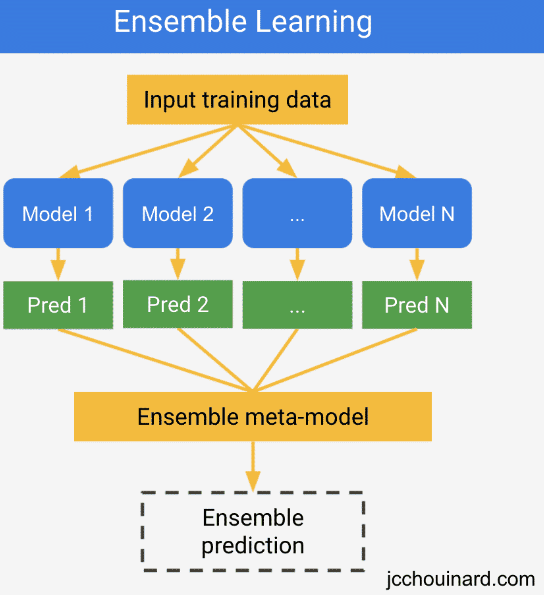

#Bagging

**Bootstrap aggregation**, also known as bagging, works by training multiple models independently and combining later(using some deterministic averaging method) to result in a strong model. This final model is more robust than those individual weak learners.

Because these constituent individual models are independent, they **can be trained parallelly** to speed-up the process. These models needn’t be of the same type(same ML algorithm), but when/if they are, the ensemble model is said to be “homogeneous” else it is called a “heterogeneous” model. Bagging method based models are homogeneous most of the time.

Weak learners are trained on **bootstrapped samples from the original training dataset**. The bootstrapping method resamples the data from the training dataset and aims to help in decreasing the variance of the model and **reduce overfitting**. 

There are multiple possible ways to combine the results of weak learners to get the final output. Two of the most popular ways are:
* **Hard voting**, where output class votes are collected from individual weak learners and the class getting the highest number of votes is selected as the final output class
* **Soft voting**, where class probabilities are collected from individual models and then averaged to get the final class probabilities, and finally, the class with the highest probability is chosen as the final output.

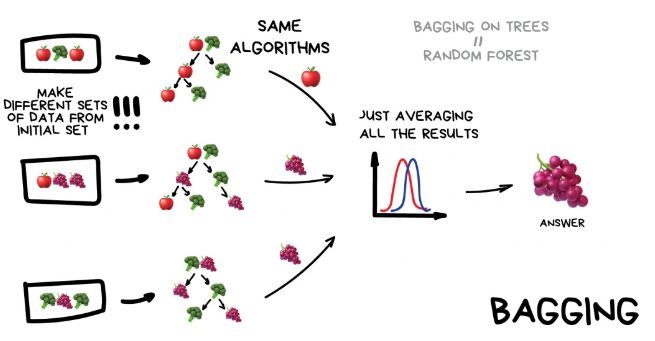

Test set R^2: 0.62


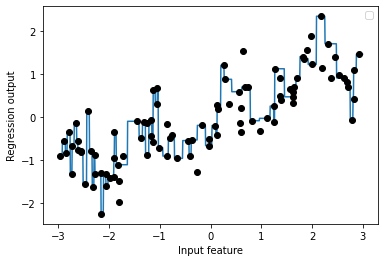

In [ ]:
from sklearn.svm import SVR
import mglearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg=KNeighborsRegressor(n_neighbors=1)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
 
plt.figure();ax=plt.gca() 
ax.plot(line, reg.predict(line))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


Test set R^2: 0.76


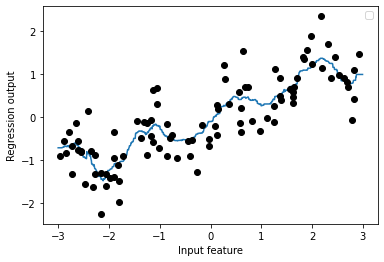

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

regr = BaggingRegressor(base_estimator=reg,
                         n_estimators=100, max_samples=0.2, random_state=0)

regr.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(regr.score(X_test, y_test)))
 
plt.figure();ax=plt.gca() 
ax.plot(line, regr.predict(line))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


## Random Forests

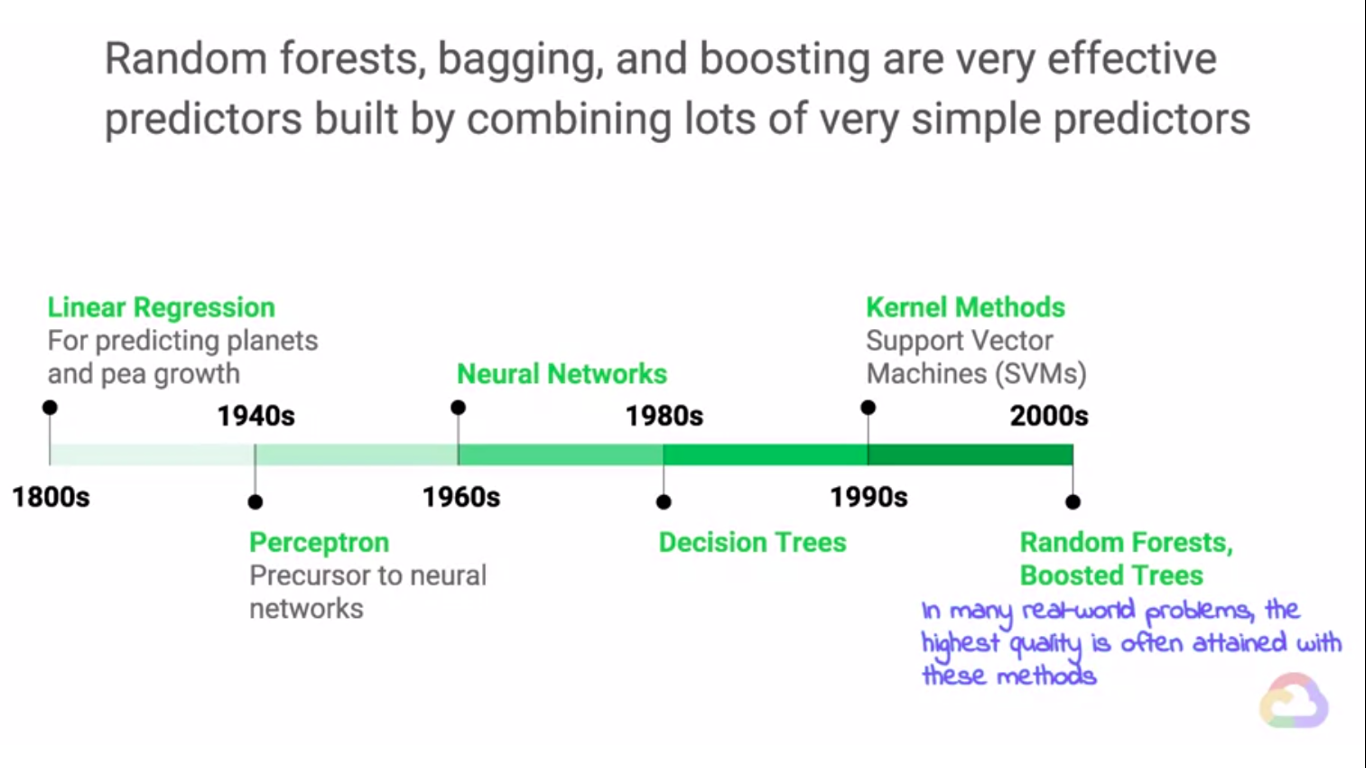

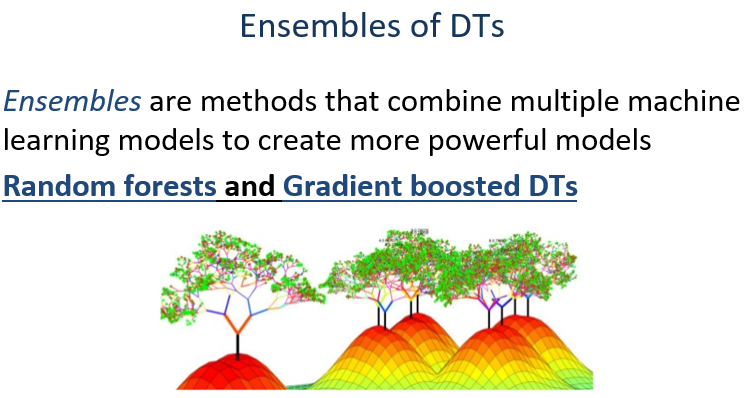

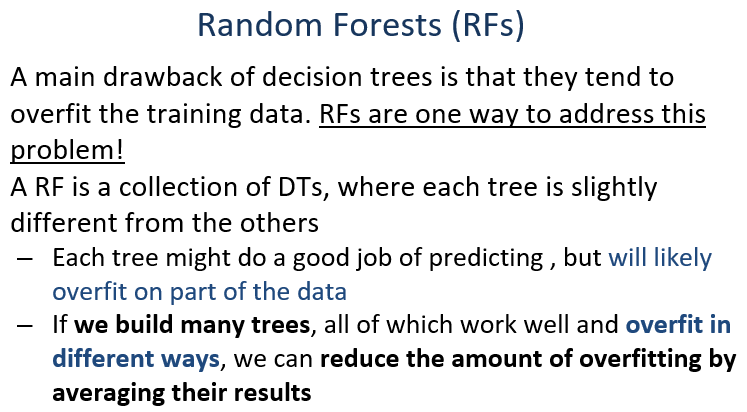

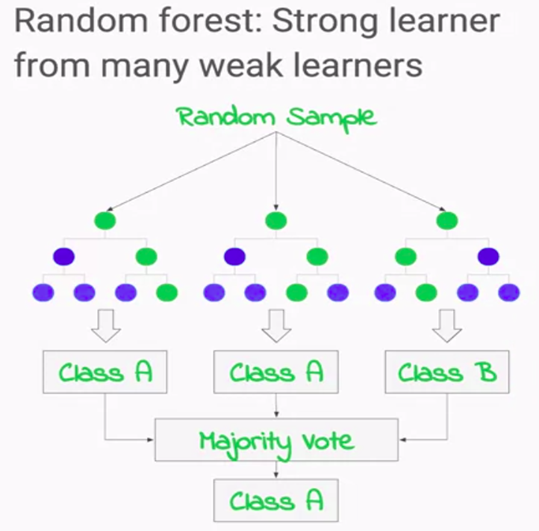

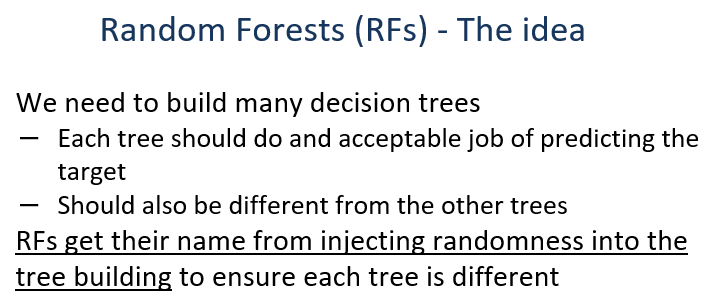

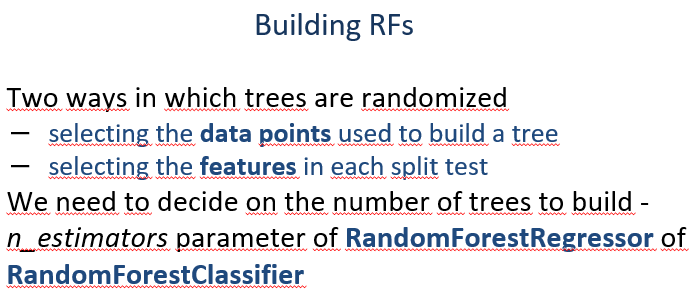

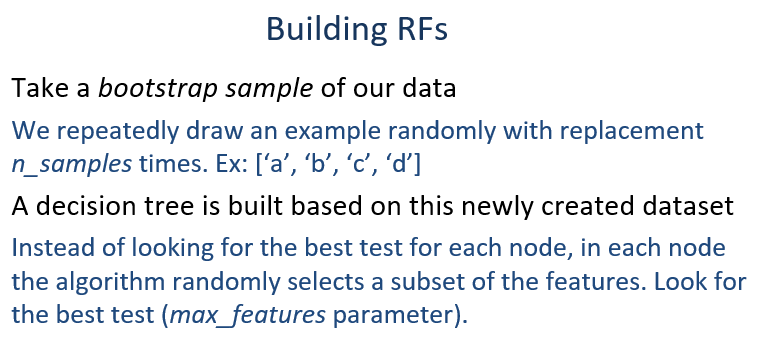

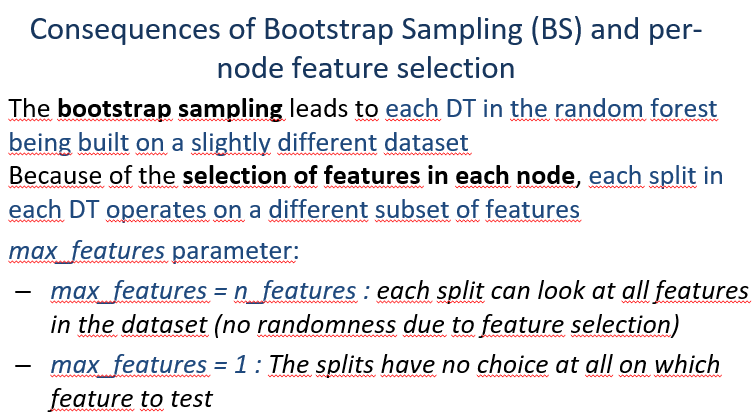

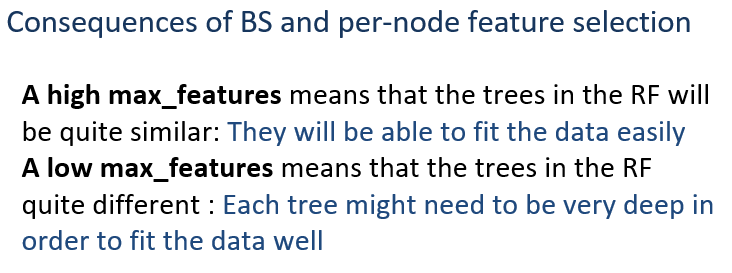

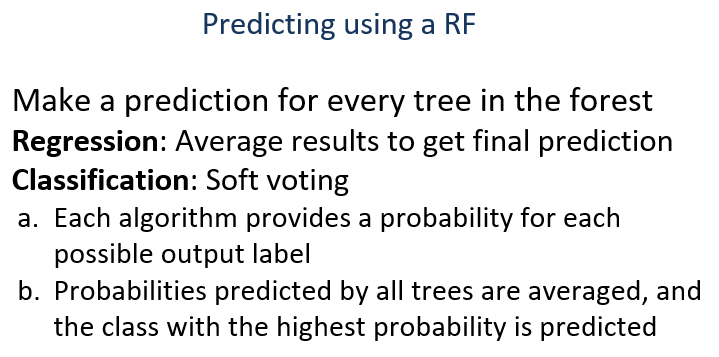

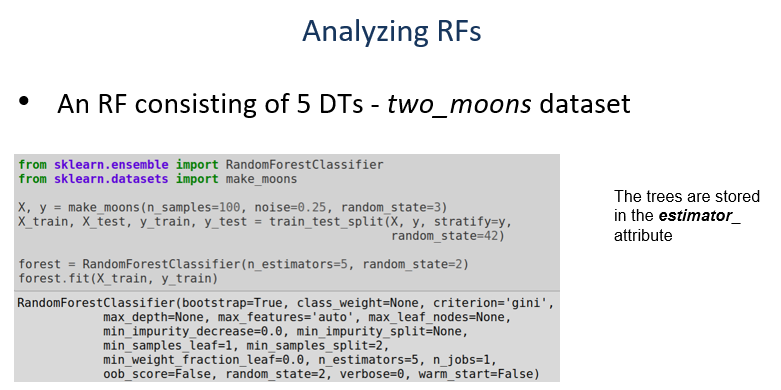

Test set Accuracy: 0.89
Test set Accuracy: 0.84


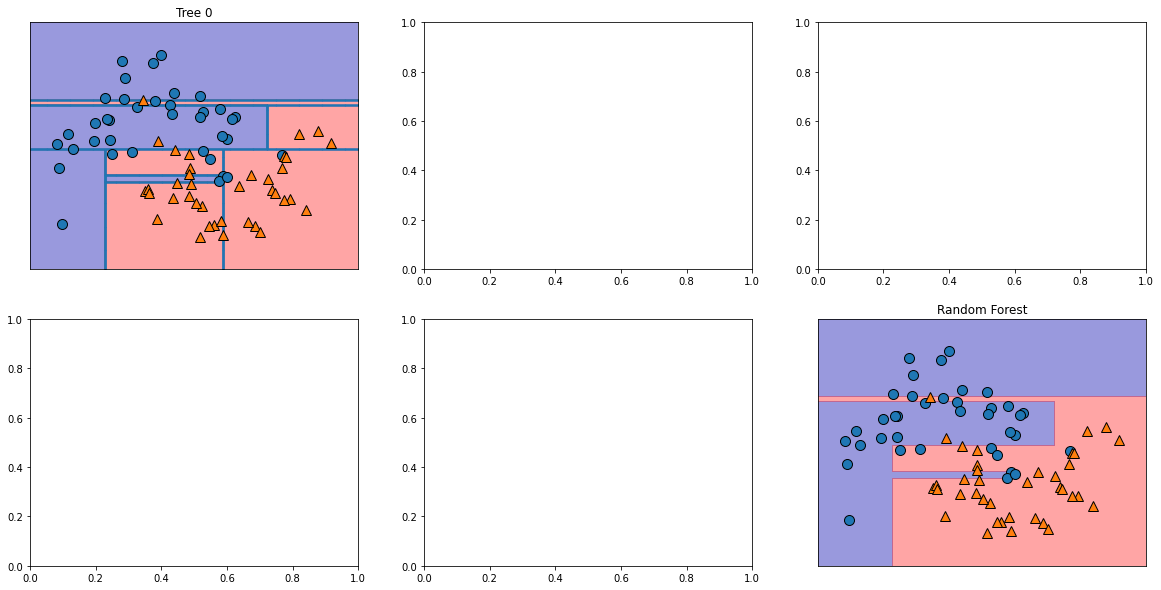

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

print("Test set Accuracy: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set Accuracy: {:.2f}".format(forest.score(X_test, y_test)))

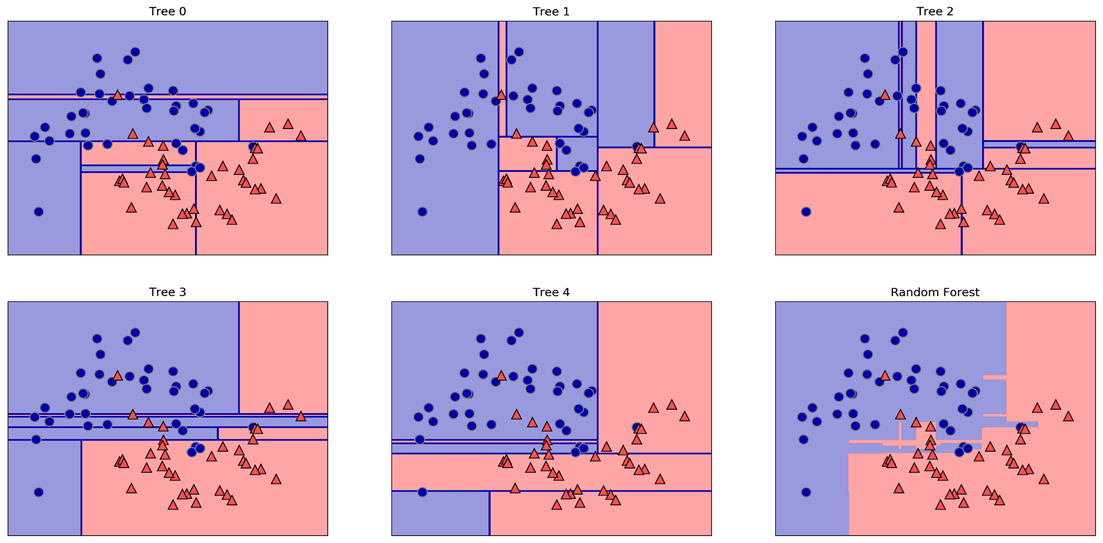

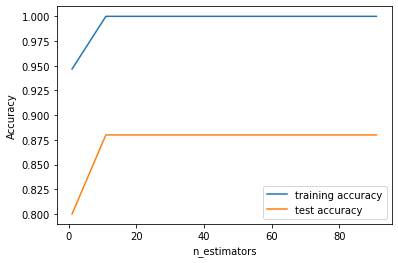

In [ ]:
training_accuracy = []
test_accuracy = []

for n_estimators in range(1,100,10):
    # build the model
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42, min_samples_split=2)
    forest.fit(X_train, y_train)
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))

plt.plot(range(1,100,10), training_accuracy, label="training accuracy")
plt.plot(range(1,100,10), test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()


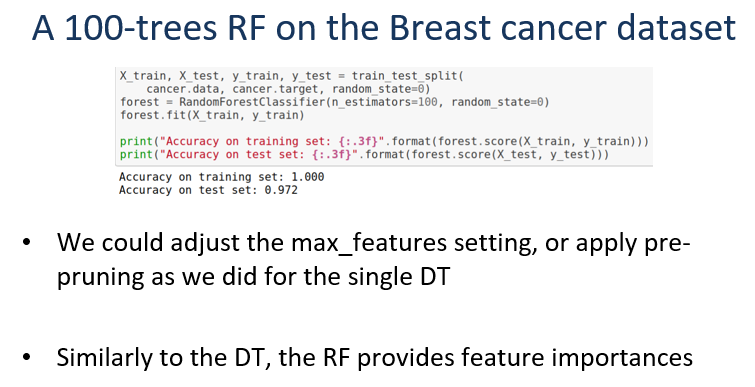

Accuracy on training set: 1.000
Accuracy on test set: 0.972


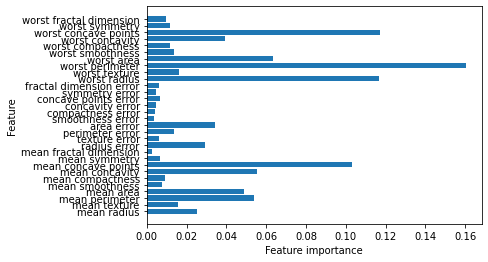

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(forest)

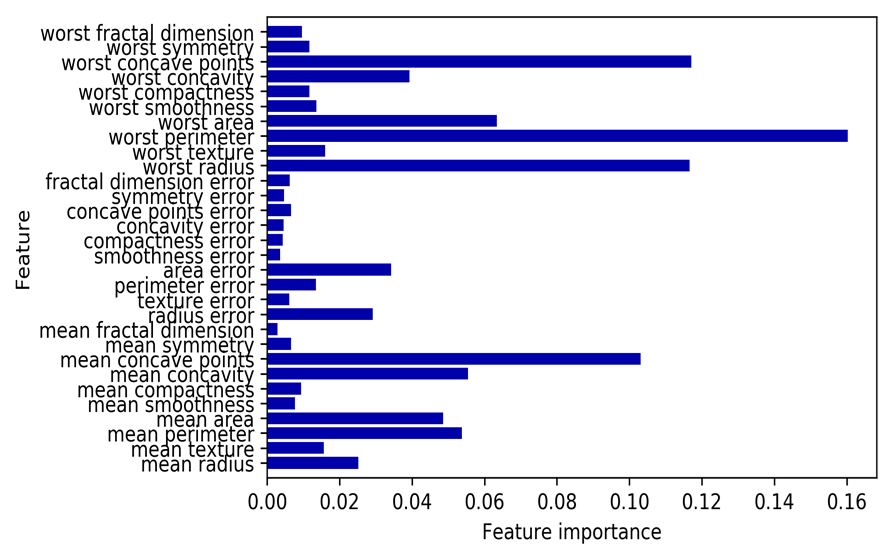

## Boosting

Unlike bagging, that mainly aims at reducing variance, boosting is a technique that consists in fitting sequentially multiple weak learners in a very adaptative way: each model in the sequence is **fitted giving more importance to observations in the dataset that were badly handled by the previous models** in the sequence. 

Each new model focus its efforts on the most difficult observations to fit up to now, so that we obtain, at the end of the process, a strong learner with lower bias (even if we can notice that boosting can also have the effect of reducing variance). 

Being mainly focused at reducing bias, the base models that are often considered for boosting are models with low variance but high bias. 

Computations to fit the different models can’t be done in parallel (unlike bagging), it could become too expensive to fit sequentially several complex models.

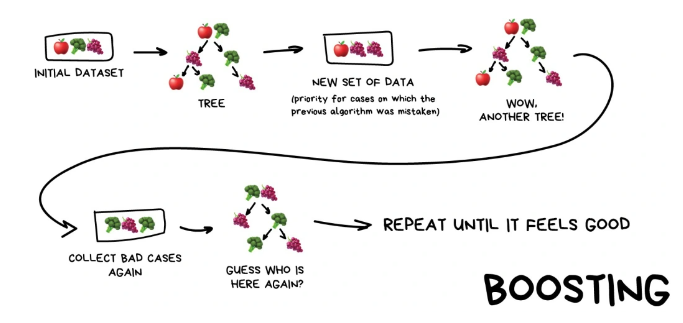

Test set R^2: 0.44


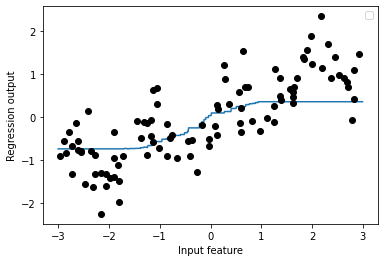

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg=KNeighborsRegressor(n_neighbors=40)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))
 
plt.figure();ax=plt.gca() 
ax.plot(line, reg.predict(line))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Test set R^2: 0.54


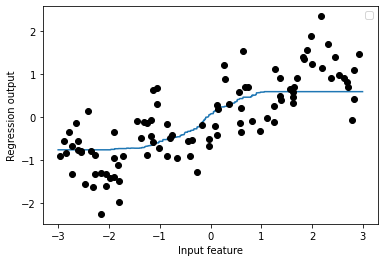

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

regr = AdaBoostRegressor(base_estimator=reg, n_estimators=100, learning_rate=0.1, random_state=0)

regr.fit(X_train, y_train)

print("Test set R^2: {:.2f}".format(regr.score(X_test, y_test)))
 
plt.figure();ax=plt.gca() 
ax.plot(line, regr.predict(line))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

## Adaptive and Gradient Boosting

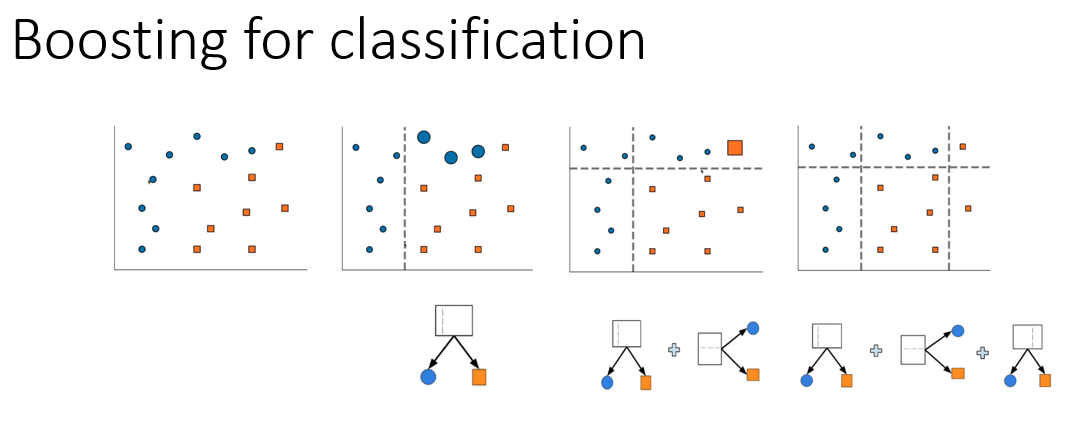

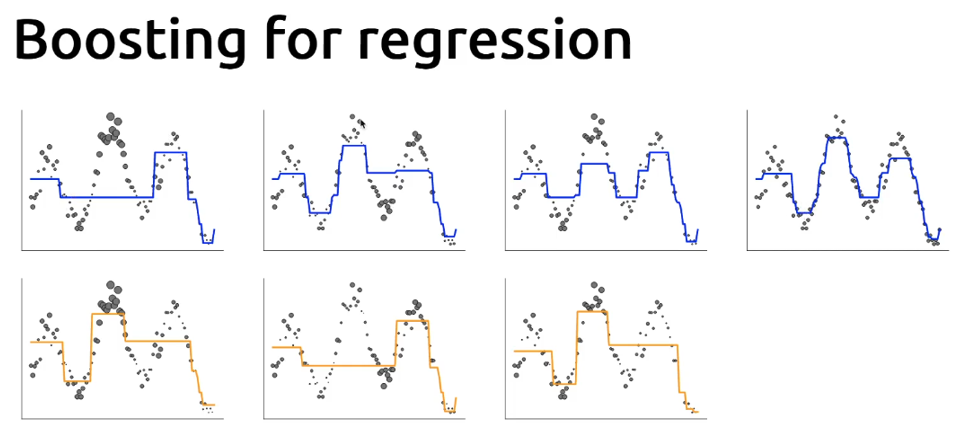

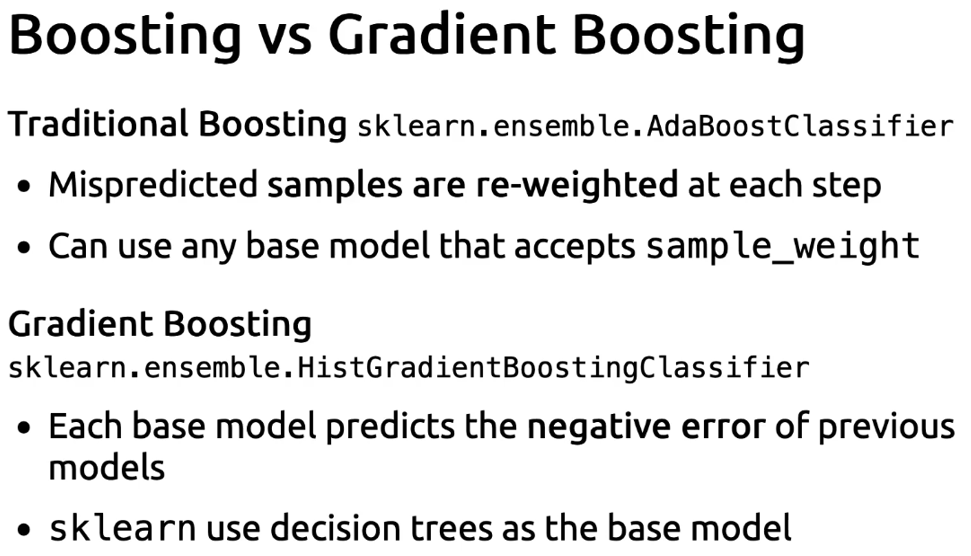

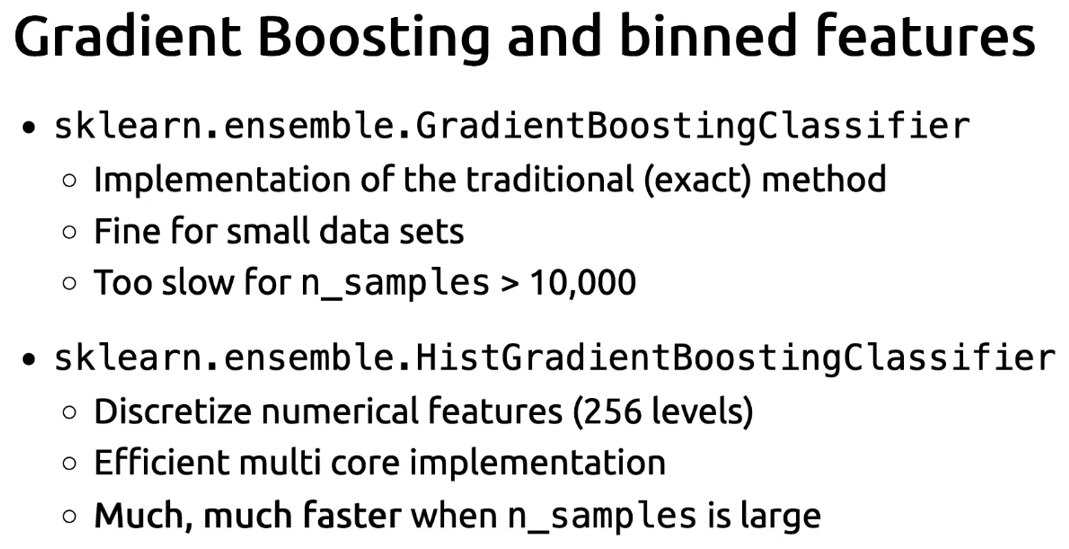

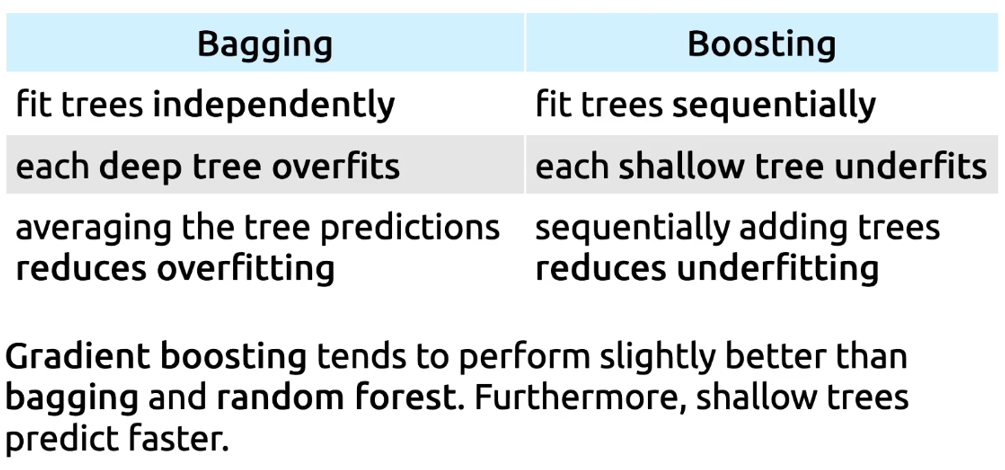

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
forest = AdaBoostClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print("AdaBoost Test set Accuracy: {:.2f}".format(forest.score(X_train, y_train)))
print("AdaBoost Test set Accuracy: {:.2f}".format(forest.score(X_test, y_test)))

forest = HistGradientBoostingClassifier(max_iter=100, max_depth=1, random_state=42)
forest.fit(X_train, y_train)
print("HistGradientBoosting Test set Accuracy: {:.2f}".format(forest.score(X_train, y_train)))
print("HistGradientBoosting Test set Accuracy: {:.2f}".format(forest.score(X_test, y_test)))

forest = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
forest.fit(X_train, y_train)
print("GradientBoosting Test set Accuracy: {:.2f}".format(forest.score(X_train, y_train)))
print("GradientBoosting Test set Accuracy: {:.2f}".format(forest.score(X_test, y_test)))

AdaBoost Test set Accuracy: 1.00
AdaBoost Test set Accuracy: 0.84
HistGradientBoosting Test set Accuracy: 0.93
HistGradientBoosting Test set Accuracy: 0.76
GradientBoosting Test set Accuracy: 1.00
GradientBoosting Test set Accuracy: 0.80
